In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from stl import mesh
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA

In [3]:
stl_file_path = input("Input the STL_FILE_PATH")
try:
  stl_data = mesh.Mesh.from_file(stl_file_path)
except:
  print("Reject Your INPUT")
  stl_data = mesh.Mesh.from_file('./data/Busako_RF.stl')
second_data = mesh.Mesh.from_file('./data/RF_01_CT_for_print.stl')
# stl_data.save()

In [4]:
def mesh_scale(stl_data, scale_x, scale_y, scale_z):
    stl_data.x = stl_data.x * scale_x
    stl_data.y = stl_data.y * scale_y
    stl_data.z = stl_data.z * scale_z 
    return stl_data

/var/folders/1g/7z1blf097c3bbnb3rrqn7n1h0000gn/T/ipykernel_77744/937074691.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure)
/var/folders/1g/7z1blf097c3bbnb3rrqn7n1h0000gn/T/ipykernel_77744/937074691.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure2)


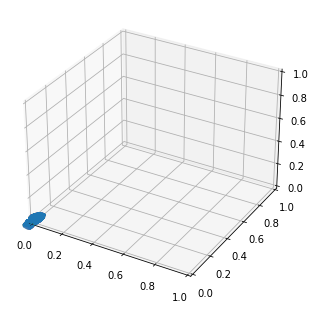

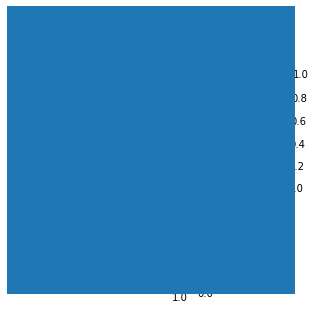

In [5]:
figure = plt.figure()
axes = mplot3d.Axes3D(figure)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(stl_data.vectors))

figure2 = plt.figure()
axes = mplot3d.Axes3D(figure2)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(second_data.vectors))
plt.show()


In [6]:
import pyvista as pv

busako_scanned_data = pv.read(stl_file_path)
busako_ct_data = pv.read("./data/RF_01_CT_for_print.stl")

scanned_data = busako_scanned_data.plot()
ct_data = busako_ct_data.plot()

FileNotFoundError: File (/Users/hayashinorito/Documents/dev/3d_model/data/RF_01_CT_for_printed.stl) not found

In [ ]:
points = stl_data.points.reshape([-1, 3])
print(points)
stl_list = np.unique(points, axis=0)

print("-------------------------------------")
sec_points = second_data.points.reshape([-1, 3])
print(sec_points)
sec_list = np.unique(sec_points, axis=0)



[[ 0.01018218  0.05246856 -0.00335901]
 [ 0.0111187   0.05274234 -0.00289117]
 [ 0.01096732  0.05307309 -0.0032502 ]
 ...
 [-0.02558966  0.00461282 -0.02355225]
 [-0.02615133  0.00449591 -0.02385059]
 [-0.02574923  0.00394216 -0.02338809]]
-------------------------------------
[[ 85.9022     36.279697    5.0608506]
 [ 85.85       36.134502    5.12136  ]
 [ 85.5729     36.2611      5.1209154]
 ...
 [ 41.805      82.75      236.42     ]
 [ 41.9641     84.5409    238.514    ]
 [ 41.6132     84.5867    236.173    ]]


In [ ]:
print(stl_list)
print(type(stl_list))
print("スキャンデータ点群個数:",len(stl_list))

print('CGデータの点群個数',len(sec_list))

[[-0.03327065  0.00234005  0.01609725]
 [-0.033243    0.00264424  0.01702733]
 [-0.03323493  0.00196796  0.01697673]
 ...
 [ 0.03323697  0.07184673  0.0104382 ]
 [ 0.03324331  0.07133729  0.00922775]
 [ 0.03327065  0.07126437  0.01011996]]
<class 'numpy.ndarray'>
スキャンデータ点群個数: 41572
CGデータの点群個数 331226


In [ ]:
import pandas as pd
df = pd.DataFrame(data=stl_list, columns=["x1", "y1", "z1"])
df.head()



,x1,y1,z1
0,-0.033271,0.002340,0.016097
1,-0.033243,0.002644,0.017027
2,-0.033235,0.001968,0.016977
3,-0.033187,0.002279,0.017652
4,-0.033167,0.001548,0.016117


In [ ]:
sec_df = pd.DataFrame(data=sec_list, columns=["x2", "y2", "z2"])
sec_df.head()

,x2,y2,z2
0,18.446901,99.192703,85.468102
1,18.448298,98.603600,85.522408
2,18.451702,98.580200,84.946007
3,18.452396,99.214798,85.184502
4,18.452898,99.216003,85.790398


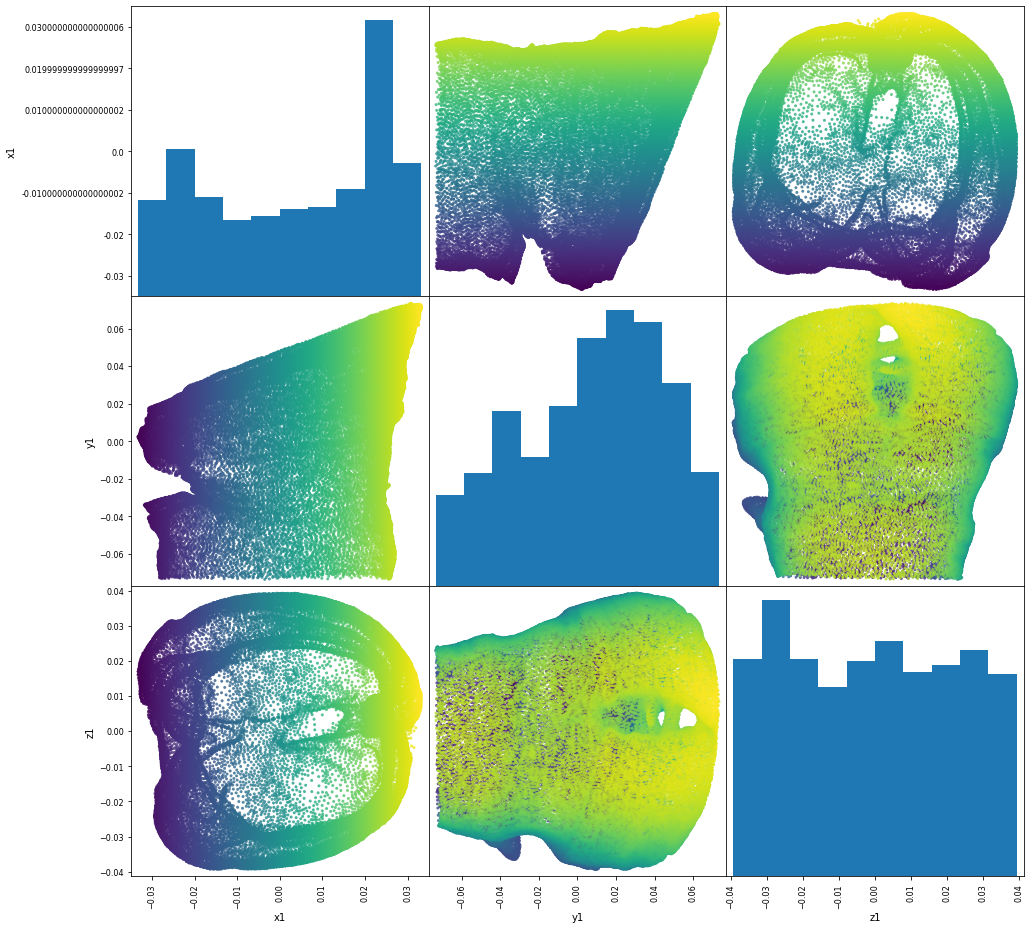

In [ ]:
from pandas import plotting
plotting.scatter_matrix(df.iloc[:, 0:], figsize=(16, 16),c=list(df.iloc[:, 0]), alpha=0.8)
plt.show()


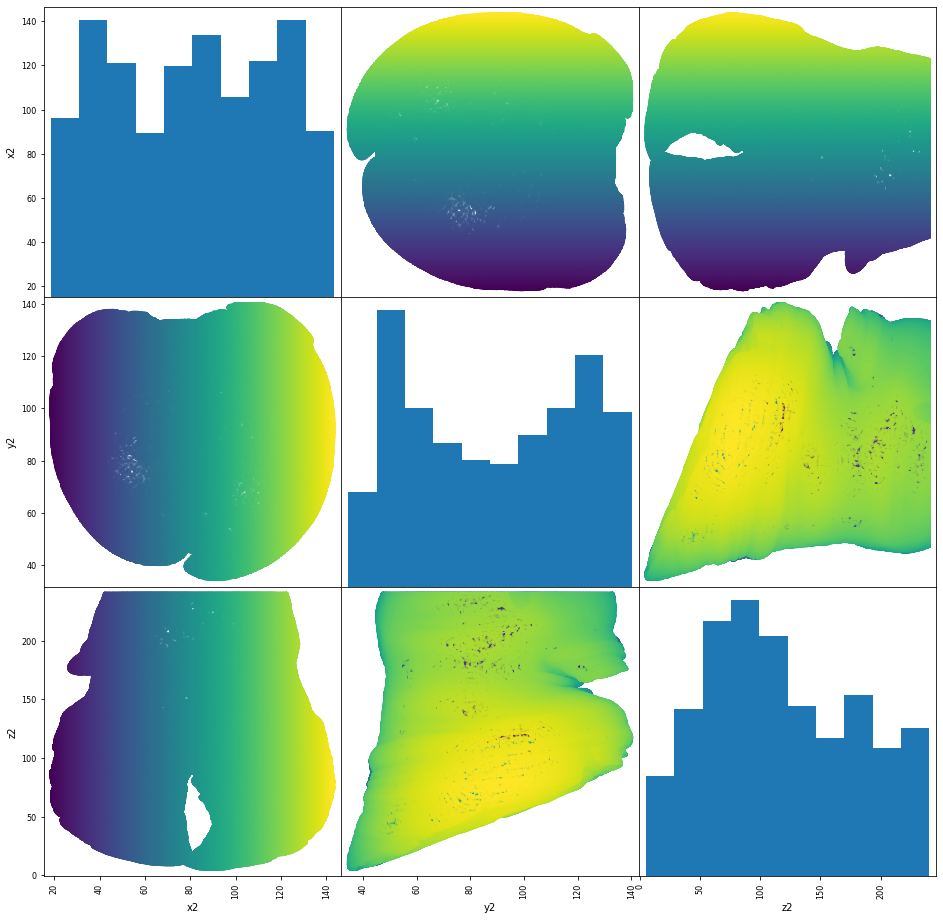

In [ ]:
from pandas import plotting
plotting.scatter_matrix(sec_df.iloc[:, 0:], figsize=(16, 16),c=list(sec_df.iloc[:, 0]), alpha=0.8)
plt.show()

In [ ]:
# 標準化
dfs = df.iloc[:, 0:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,x1,y1,z1
0,-1.818598,-0.136557,0.742347
1,-1.817239,-0.128298,0.783103
2,-1.816843,-0.146659,0.780886
3,-1.814479,-0.138212,0.810487
4,-1.813512,-0.158071,0.743201


In [ ]:
# 標準化
sec_dfs = sec_df.iloc[:, 0:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
sec_dfs.head()

,x2,y2,z2
0,-1.781287,0.340817,-0.533717
1,-1.781247,0.321821,-0.532837
2,-1.781150,0.321066,-0.542171
3,-1.781131,0.341530,-0.538309
4,-1.781116,0.341569,-0.528498


In [ ]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3
0,1.262256,0.984823,-1.146233
1,1.249856,1.024434,-1.149111
2,1.262789,1.023344,-1.135928
3,1.251101,1.051777,-1.138785
4,1.273705,0.986345,-1.127364


In [ ]:
#主成分分析の実行
sec_pca = PCA()
sec_pca.fit(sec_dfs)
# データを主成分空間に写像
sec_feature = sec_pca.transform(sec_dfs)
# 主成分得点
print("CGデータの主成分得点")
pd.DataFrame(sec_feature, columns=["PC{}".format(x + 1) for x in range(len(sec_dfs.columns))]).head()

CGデータの主成分得点


,PC1,PC2,PC3
0,-0.165171,1.787192,-0.593914
1,-0.152520,1.789111,-0.579846
2,-0.145478,1.790296,-0.585905
3,-0.162444,1.787549,-0.597664
4,-0.169300,1.786272,-0.590763


# 主成分分析完了

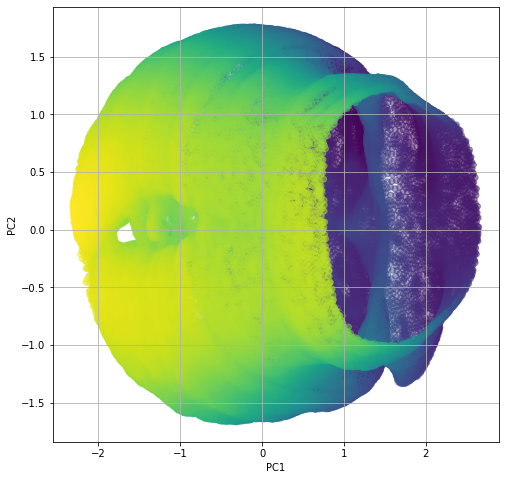

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.zlabel("第三主成分")
plt.show()

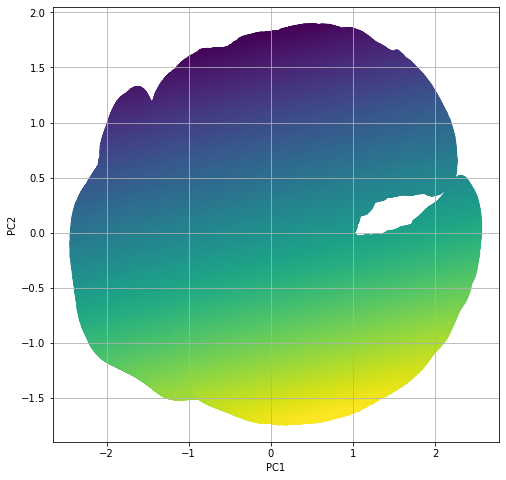

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(sec_feature[:, 0], sec_feature[:, 1], alpha=0.5, c=list(sec_df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.zlabel("第三主成分")
plt.show()

In [ ]:
with pd.ExcelWriter('./data_xl/model_points.xlsx') as w:
  df.to_excel(w)

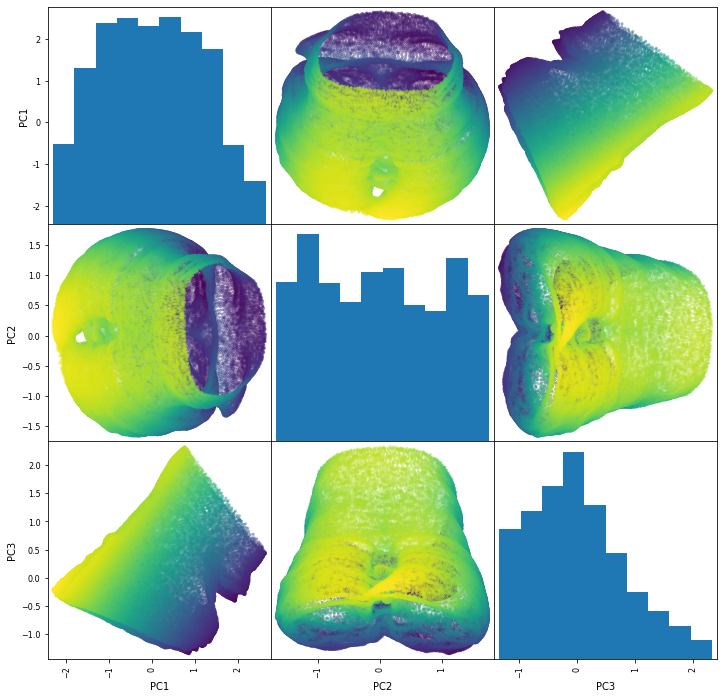

In [ ]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(12, 12), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

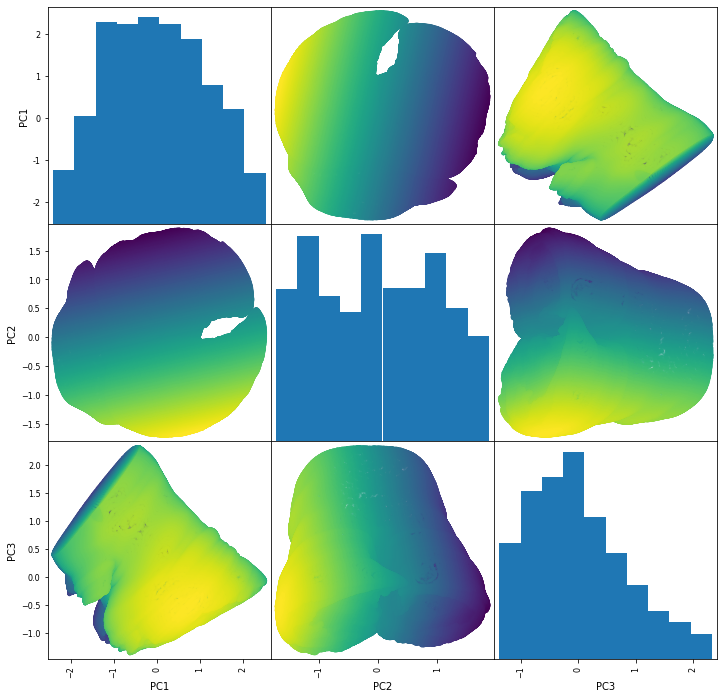

In [ ]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(sec_feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(sec_dfs.columns))]), 
                        figsize=(12, 12), c=list(sec_df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [ ]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, columns=["スキャンデータ"], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,スキャンデータ
PC1,0.450000
PC2,0.331331
PC3,0.218669


In [ ]:
# 寄与率
pd.DataFrame(sec_pca.explained_variance_ratio_, columns=["CGデータ"], index=["PC{}".format(x + 1) for x in range(len(sec_dfs.columns))])

,CGデータ
PC1,0.437190
PC2,0.330342
PC3,0.232468


In [ ]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[0:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,x1,y1,z1
PC1,-0.697893,-0.702665,-0.138591
PC2,-0.133051,-0.062940,0.989109
PC3,0.703735,-0.708731,0.049565
